Alumna : Ju'arez Torres Karla Romina

Profesor : Francisco Pérez Carbajal

Materia : Proyecto 1


In [1]:
pip install flexpolyline

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
# Biblioteca para realizar solicitudes HTTP
import requests

# Manipulación de datos
import pandas as pd

# Imprime estructuras de datos complejas de manera legible
import pprint

# Crea mapas interactivos
import folium

# Decodifica polilíneas en formato FlexPolyline
import flexpolyline as fp

# Visualización de datos estadísticos
import seaborn as sns

# Tiempo
import pytz
from datetime import datetime

# Manipulación de datos numéricos
import numpy as np

# Visualiza las rutas
import IPython

# Random
import random

ModuleNotFoundError: No module named 'pandas'

In [3]:
def utctodate(utc):# Obtener la zona horaria local
    local_tz = pytz.timezone('America/Mexico_City')

    # Convertir el timestamp a datetime
    utc_time = datetime.fromtimestamp(utc, pytz.utc)

    # Convertir de UTC a la zona horaria local
    local_time = utc_time.astimezone(local_tz)

    # Formatear la fecha y hora
    formatted_time = local_time.strftime('%Y-%m-%d %H:%M:%S')
    return formatted_time

In [4]:
URL = 'https://gbfs.mex.lyftbikes.com/gbfs/en/station_information.json'
r = requests.get(URL)

In [5]:
pprint.pprint(r.json())

Se truncaron las últimas líneas 5000 del resultado de transmisión.
                        'rental_methods': ['KEY', 'CREDITCARD'],
                        'short_name': '027',
                        'station_id': '279'},
                       {'capacity': 19,
                        'eightd_has_key_dispenser': False,
                        'electric_bike_surcharge_waiver': False,
                        'external_id': 'd2cdc2a2-ca10-418f-a13f-1846d34f8fb4',
                        'has_kiosk': True,
                        'is_charging': False,
                        'lat': 19.427575,
                        'lon': -99.17702,
                        'name': 'CE-252 Víctor Hugo-Shakespeare',
                        'rental_methods': ['KEY', 'CREDITCARD'],
                        'short_name': '252',
                        'station_id': '280'},
                       {'capacity': 15,
                        'eightd_has_key_dispenser': False,
                        'electric_bike_s

In [6]:
# Define la URL donde se encuentra el archivo JSON con la información
# de las estaciones de bicicletas
URL = 'https://gbfs.mex.lyftbikes.com/gbfs/en/station_information.json'

# Realiza una solicitud GET a la URL en formato JSON
r = requests.get(URL)

# Convierte el contenido de la respuesta a un diccionario de Python y
# extrae la información de las estaciones
stations_data = r.json()['data']['stations']

# Convierte los datos de las estaciones en un DataFrame de Pandas
df_stations = pd.DataFrame(stations_data)

#df_stations = df_stations[df_stations['lat']!=0]
df_stations_station_id = df_stations.station_id
df_stations_short_name = df_stations.short_name
df_stations_lat = df_stations.lat
df_stations_lon = df_stations.lon
df_stations_capacity = df_stations.capacity

df_part1 = pd.concat([df_stations_station_id,df_stations_short_name,df_stations_lat,df_stations_lon,df_stations_capacity],axis=1)

In [7]:
URL = 'https://gbfs.mex.lyftbikes.com/gbfs/en/station_status.json'
r = requests.get(URL)
df_status_stations = pd.DataFrame(r.json()['data']['stations'])
#df_status_stations = df_status_stations[df_status_stations['is_installed']!=0]

In [8]:
df_status_stations_num_bikes_available = df_status_stations.num_bikes_available
df_status_stations_num_bikes_disabled = df_status_stations.num_bikes_disabled
df_status_stations_num_docks_available = df_status_stations.num_docks_available
df_status_stations_num_docks_disabled = df_status_stations.num_docks_disabled

df_part2 = pd.concat([df_status_stations_num_bikes_available,df_status_stations_num_bikes_disabled,df_status_stations_num_docks_available,df_status_stations_num_docks_disabled],axis=1)

In [9]:
last_updated_list = []
utclu = utctodate(r.json()['last_updated'])
for i in range(len(df_status_stations)):
    last_updated_list.append(utclu)
df_part3 = pd.DataFrame({'last_updated': last_updated_list})

In [10]:
API_KEY = input("Please enter your OpenWeatherMap API key: ")#
#API_KEY = 'e34c77410f818e358970a07534bb6afa'

Please enter your OpenWeatherMap API key: e34c77410f818e358970a07534bb6afa


In [11]:
temp_c_list = []
wind_speed_list = []
humidity_list = []
clouds_list = []

In [12]:
i = 0
URLWM_base = 'https://api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&units=metric&appid={API}'

for i in range(len(df_stations_lat)):
#for i in range(5):
    lati = df_stations_lat[i]
    longi = df_stations_lon[i]
    print('Datos obtenidos para:' ,lati, longi)
    URLWM = URLWM_base.format(lat=lati, lon=longi, API=API_KEY)
    print(URLWM)
    rWM = requests.get(URLWM)
    temp_c_list.append(rWM.json()['main']['temp'])
    wind_speed_list.append(rWM.json()['wind']['speed'])
    humidity_list.append(rWM.json()['main']['humidity'])
    clouds_list.append(rWM.json()['clouds']['all'])
    print(URLWM)

Datos obtenidos para: 19.416795 -99.192508
https://api.openweathermap.org/data/2.5/weather?lat=19.416795&lon=-99.192508&units=metric&appid=e34c77410f818e358970a07534bb6afa
https://api.openweathermap.org/data/2.5/weather?lat=19.416795&lon=-99.192508&units=metric&appid=e34c77410f818e358970a07534bb6afa
Datos obtenidos para: 19.36726591257277 -99.15865559132271
https://api.openweathermap.org/data/2.5/weather?lat=19.36726591257277&lon=-99.15865559132271&units=metric&appid=e34c77410f818e358970a07534bb6afa
https://api.openweathermap.org/data/2.5/weather?lat=19.36726591257277&lon=-99.15865559132271&units=metric&appid=e34c77410f818e358970a07534bb6afa
Datos obtenidos para: 19.363404 -99.160395
https://api.openweathermap.org/data/2.5/weather?lat=19.363404&lon=-99.160395&units=metric&appid=e34c77410f818e358970a07534bb6afa
https://api.openweathermap.org/data/2.5/weather?lat=19.363404&lon=-99.160395&units=metric&appid=e34c77410f818e358970a07534bb6afa
Datos obtenidos para: 19.364905637923787 -99.1629

In [13]:
len(temp_c_list)

684

In [14]:
print(temp_c_list)
print(wind_speed_list)
print(humidity_list)
print(clouds_list)

[20.53, 20.69, 20.68, 20.68, 20.68, 20.6, 20.6, 20.6, 20.6, 20.66, 20.72, 20.69, 22.79, 20.62, 20.67, 20.69, 20.58, 20.56, 20.69, 22.79, 22.79, 20.58, 20.52, 20.62, 20.6, 22.71, 22.71, 20.67, 20.6, 20.6, 20.67, 22.7, 22.79, 20.52, 20.56, 20.62, 20.58, 20.6, 20.58, 20.6, 20.63, 20.58, 20.58, 20.56, 20.68, 20.68, 20.62, 20.68, 22.79, 20.69, 20.62, 20.67, 20.6, 20.56, 20.58, 20.62, 20.56, 20.56, 22.79, 20.56, 20.56, 20.63, 20.56, 20.63, 20.63, 20.66, 20.66, 20.66, 22.79, 20.56, 20.63, 22.79, 20.63, 20.69, 20.66, 20.69, 20.69, 20.66, 20.69, 20.69, 20.69, 20.69, 20.71, 20.69, 20.66, 20.71, 20.66, 20.66, 20.69, 20.66, 20.63, 20.69, 20.71, 20.72, 20.74, 20.74, 20.72, 20.72, 20.72, 20.72, 20.72, 20.74, 20.7, 20.71, 20.72, 20.71, 20.74, 20.71, 20.74, 20.72, 22.86, 20.72, 20.72, 20.66, 20.66, 20.71, 20.71, 20.66, 20.66, 20.71, 20.7, 20.72, 20.72, 20.71, 20.72, 20.65, 20.71, 20.71, 20.72, 20.71, 20.71, 20.66, 20.71, 22.86, 20.73, 20.72, 20.66, 20.71, 20.71, 20.66, 20.66, 20.49, 20.51, 20.59, 20.5

In [15]:
df_temp_c= pd.DataFrame({'temp_c': temp_c_list})
df_wind_kph = pd.DataFrame({'wind_kph': wind_speed_list})
df_humidity = pd.DataFrame({'humidity': humidity_list})
df_cloud = pd.DataFrame({'clouds': clouds_list})

In [16]:
df_part4 = pd.concat([df_temp_c,df_wind_kph,df_humidity,df_cloud],axis=1)
df_part4

,temp_c,wind_kph,humidity,clouds
0,20.53,6.17,49,75
1,20.69,6.17,49,75
2,20.68,6.17,49,75
3,20.68,6.17,49,75
4,20.68,6.17,49,75
...,...,...,...,...
679,23.44,6.97,86,100
680,23.44,6.97,86,100
681,23.44,6.97,86,100
682,23.44,6.97,86,100


In [17]:
Dataframe_final = pd.concat([df_part1,df_part2,df_part3,df_part4],axis=1)
Dataframe_final = Dataframe_final[Dataframe_final['lat']!=0]
#df_status_stations = df_status_stations[df_status_stations['is_installed']!=0]

In [18]:
Dataframe_final.to_csv('Dataframe_final.csv')

In [19]:
avg_temp = Dataframe_final['temp_c'].mean()
print(f"La temperatura promedio en todas las estaciones es de: {avg_temp:.2f} degrees Celsius")


La temperatura promedio en todas las estaciones es de: 20.75 degrees Celsius


<Axes: >

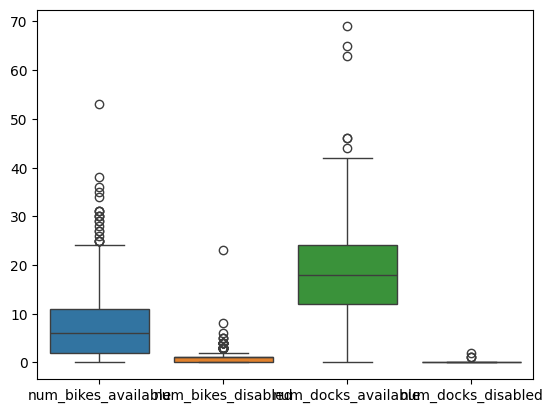

In [20]:
sns.boxplot(data=Dataframe_final[['num_bikes_available', 'num_bikes_disabled', 'num_docks_available', 'num_docks_disabled']])


In [30]:
# Análisis de los boxplots

# Mediana:
# - num_bikes_available: La mediana se encuentra alrededor de 3 bicicletas disponibles.
# - num_bikes_disabled: La mediana indica que típicamente hay 0 bicicletas deshabilitadas.
# - num_docks_available: La mediana muestra alrededor de 7 espacios disponibles.
# - num_docks_disabled: La mediana sugiere que usualmente hay 0 espacios deshabilitados.

# Dispersión:
# - num_bikes_available: Los datos muestran una dispersión considerable, con un rango intercuartil amplio. Esto indica una variabilidad en la cantidad de bicicletas disponibles en las estaciones.
# - num_bikes_disabled: La dispersión es menor, concentrándose en valores bajos.
# - num_docks_available: La dispersión es moderada, con un rango intercuartil más estrecho que  el de bicicletas disponibles.
# - num_docks_disabled: La dispersión es mínima, similar a la de bicicletas deshabilitadas.

# Valores atípicos:
# - num_bikes_available: Se observan algunos valores atípicos superiores, indicando estaciones con una cantidad significativamente mayor de bicicletas disponibles en comparación con la mayoría.
# - num_docks_available: También se presentan valores atípicos superiores, representando estaciones con una mayor cantidad de espacios disponibles.

# Conclusiones:
# - En general, las estaciones tienden a tener una cantidad moderada de bicicletas disponibles y espacios libres.
# - La variabilidad en la cantidad de bicicletas disponibles sugiere que algunas estaciones experimentan una mayor demanda o reabastecimiento.
# - La presencia de valores atípicos indica que existen estaciones con características distintas en términos de disponibilidad de bicicletas y espacios.


In [21]:
#Determina entre todas las estaciones qué estaciones están más cerca entre sí
# geográficamente.

from sklearn.neighbors import BallTree

# Convertir las coordenadas de latitud y longitud a radianes
Dataframe_final['lat_rad'] = np.radians(Dataframe_final['lat'])
Dataframe_final['lon_rad'] = np.radians(Dataframe_final['lon'])

# Crear una matriz de coordenadas
coords = Dataframe_final[['lat_rad', 'lon_rad']].values

# Crear un BallTree
tree = BallTree(coords, metric='haversine')

# Encontrar los vecinos más cercanos para cada punto
distances, indices = tree.query(coords, k=2)

# La distancia al vecino más cercano está en la segunda columna (índice 1)
# ya que la primera columna (índice 0) es la distancia a sí mismo.
Dataframe_final['nearest_distance'] = distances[:, 1]
Dataframe_final['nearest_station'] = indices[:, 1]

# Convertir la distancia de radianes a kilómetros
earth_radius = 6371
Dataframe_final['nearest_distance'] = Dataframe_final['nearest_distance'] * earth_radius

# Encontrar las dos estaciones más cercanas entre sí
min_distance = Dataframe_final['nearest_distance'].min()
closest_stations = Dataframe_final[Dataframe_final['nearest_distance'] == min_distance]

# Imprimir los resultados
print(f"Las dos estaciones más cercanas están a una distancia de {min_distance:.2f} km.")
print(closest_stations[['short_name', 'nearest_distance', 'nearest_station']])

# Obtener los nombres de las estaciones más cercanas
station1_index = closest_stations.index[0]
station2_index = closest_stations['nearest_station'].iloc[0]
station1_name = Dataframe_final['short_name'][station1_index]
station2_name = Dataframe_final['short_name'][station2_index]

print(f"Las estaciones más cercanas son: {station1_name} y {station2_name}")


Las dos estaciones más cercanas están a una distancia de 0.01 km.
    short_name  nearest_distance  nearest_station
118        261          0.013554              286
286        013          0.013554              118
Las estaciones más cercanas son: 261 y 013


In [22]:
#Determina cual es la estación más al oeste y la que está más al este

# Encuentra la estación más al oeste (menor longitud)
west_station = Dataframe_final[Dataframe_final['lon'] == Dataframe_final['lon'].min()]

# Obtener la latitud y longitud de la estación más al oeste
west_lat = west_station['lat'].values[0]
west_lon = west_station['lon'].values[0]


# Encuentra la estación más al este (mayor longitud)
east_station = Dataframe_final[Dataframe_final['lon'] == Dataframe_final['lon'].max()]


# Obtener la latitud y longitud de la estación más al este
east_lat = east_station['lat'].values[0]
east_lon = east_station['lon'].values[0]


In [23]:
east_station

,station_id,short_name,lat,lon,capacity,num_bikes_available,num_bikes_disabled,num_docks_available,num_docks_disabled,last_updated,temp_c,wind_kph,humidity,clouds,lat_rad,lon_rad,nearest_distance,nearest_station
10,15,094,19.433766,-99.130918,23,1,1,21,0,2024-08-22 17:37:01,20.72,6.17,49,75,0.339183,-1.730161,0.308006,392


In [24]:
west_station

,station_id,short_name,lat,lon,capacity,num_bikes_available,num_bikes_disabled,num_docks_available,num_docks_disabled,last_updated,temp_c,wind_kph,humidity,clouds,lat_rad,lon_rad,nearest_distance,nearest_station
202,208,457,19.42703,-99.212845,17,0,1,16,0,2024-08-22 17:37:01,20.44,6.17,49,75,0.339066,-1.731591,0.468005,200


In [25]:

print(f"La estación más al oeste está en la latitud {west_lat} y longitud {west_lon}")
print(f"La estación más al este está en la latitud {east_lat} y longitud {east_lon}")



La estación más al oeste está en la latitud 19.42703 y longitud -99.212845
La estación más al este está en la latitud 19.433766 y longitud -99.130918


In [26]:
API_key = 'qZDURhuszLM8Zw-w-ab_KNerRoQ-O-3PBW9GwNOI8yM'
modes =   ['bicycle', 'scooter', 'car']
URLRH_base = 'https://router.hereapi.com/v8/routes?transportMode={Mode}&origin={lat_O},{lon_O}&destination={lat_D},{lon_D}&return=polyline,summary&apikey={APIkey}'

In [27]:
Colors = ['red', 'blue', 'green']
for i in range(len(modes)):
    URLRH =  URLRH_base.format(Mode = modes[i], lat_O = west_lat, lon_O=west_lon, lat_D=east_lat, lon_D=east_lon, APIkey=API_key)
    rRH = requests.get(URLRH)
    #print('Ruta para: ', modes[i])
    #rRH.json()
    print(URLRH)
    data = rRH.json()
    route = data['routes'][0]['sections'][0]
    duration_hours = route['summary']['duration']/3600
    len_km = route['summary']['length']/1000
    print('El viaje durará ',duration_hours,'horas y el recorrido será de: ', len_km)
    mapa = folium.Map(location = [west_lat, west_lon], zoom_start=14, tiles='CartoDB positron')
    folium.PolyLine(
        locations = fp.decode( route['polyline']), color=Colors[i]
).add_to(mapa)
    mapa.save(f'mapa_{modes[i]}.html')
    print('Mapa guardado como ' f'mapa_{modes[i]}.html')


https://router.hereapi.com/v8/routes?transportMode=bicycle&origin=19.42703,-99.212845&destination=19.433766,-99.130918&return=polyline,summary&apikey=qZDURhuszLM8Zw-w-ab_KNerRoQ-O-3PBW9GwNOI8yM
El viaje durará  0.7102777777777778 horas y el recorrido será de:  10.311
Mapa guardado como mapa_bicycle.html
https://router.hereapi.com/v8/routes?transportMode=scooter&origin=19.42703,-99.212845&destination=19.433766,-99.130918&return=polyline,summary&apikey=qZDURhuszLM8Zw-w-ab_KNerRoQ-O-3PBW9GwNOI8yM
El viaje durará  0.4386111111111111 horas y el recorrido será de:  10.187
Mapa guardado como mapa_scooter.html
https://router.hereapi.com/v8/routes?transportMode=car&origin=19.42703,-99.212845&destination=19.433766,-99.130918&return=polyline,summary&apikey=qZDURhuszLM8Zw-w-ab_KNerRoQ-O-3PBW9GwNOI8yM
El viaje durará  0.6169444444444444 horas y el recorrido será de:  10.194
Mapa guardado como mapa_car.html


In [28]:
# prompt: añade en un solo mapa las 3 rutas con distintos grosores de linea

mapa = folium.Map(location = [west_lat, west_lon], zoom_start=14, tiles='CartoDB positron')
grosores = [1, 10, 3]
for i in range(len(modes)):
  URLRH =  URLRH_base.format(Mode = modes[i], lat_O = west_lat, lon_O=west_lon, lat_D=east_lat, lon_D=east_lon, APIkey=API_key)
  rRH = requests.get(URLRH)
  data = rRH.json()
  route = data['routes'][0]['sections'][0]

  # Define el grosor de la línea según el modo de transporte
  if modes[i] == 'bicycle':
    weight = 3
  elif modes[i] == 'scooter':
    weight = 5
  else:  # car
    weight = 8

  folium.PolyLine(
      locations = fp.decode( route['polyline']), color=Colors[i], weight= grosores[i]
  ).add_to(mapa)

mapa
